# Classifying Fashion-MNIST


In this project, I'll build my own neural network and will classify the Fashion MNIST data with PyTorch


In [30]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

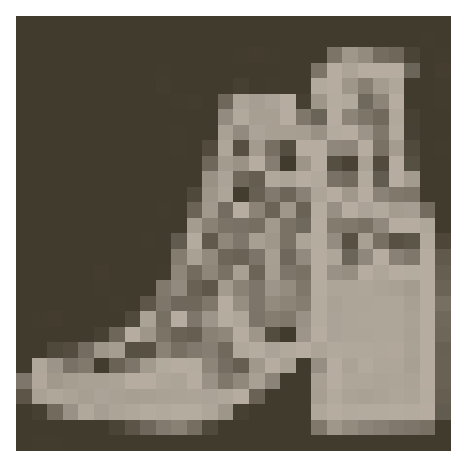

In [31]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [32]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [33]:
# TODO: Define your network architecture here
class network (nn.Module) :
    def __init__ (self):
        super().__init__()
        
        self.fc1=nn.Linear(784,300)
        #self.fc20=nn.Linear(500,300)
        self.fc21=nn.Linear(300,150)
        self.fc22=nn.Linear(150,70)
        self.fc3=nn.Linear(70,10)
        
    def forward(self,x):
        x=F.relu(self.fc1(x))
        #x=F.relu(self.fc20(x))
        x=F.relu(self.fc21(x))
        x=F.relu(self.fc22(x))
        x=F.softmax(self.fc3(x), dim=1)        
        return x
    
model=network()

model

network(
  (fc1): Linear(in_features=784, out_features=300, bias=True)
  (fc21): Linear(in_features=300, out_features=150, bias=True)
  (fc22): Linear(in_features=150, out_features=70, bias=True)
  (fc3): Linear(in_features=70, out_features=10, bias=True)
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to* Take a step with the optimizer to update the weights
 calculate the gradients

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [36]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.001)

In [37]:
epochs=15
print_every=1000
steps=0

for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        steps+=1
        images.resize_(images.shape[0],784)
        optimizer.zero_grad()
        output=model.forward(images)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
        if steps % print_every==0:
            print("Epoch:{}/{}...".format(e+1,epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
        

            running_loss=0

Epoch:1/15... Loss: 1.6515
Epoch:1/15... Loss: 1.6449
Epoch:1/15... Loss: 1.6410
Epoch:2/15... Loss: 0.4114
Epoch:2/15... Loss: 1.6430
Epoch:2/15... Loss: 1.6390
Epoch:2/15... Loss: 1.6373
Epoch:3/15... Loss: 0.8208
Epoch:3/15... Loss: 1.6346
Epoch:3/15... Loss: 1.6394
Epoch:3/15... Loss: 1.6377
Epoch:4/15... Loss: 1.2236
Epoch:4/15... Loss: 1.6380
Epoch:4/15... Loss: 1.6362
Epoch:4/15... Loss: 1.6383
Epoch:5/15... Loss: 1.6400
Epoch:5/15... Loss: 1.6330
Epoch:5/15... Loss: 1.6360
Epoch:6/15... Loss: 0.4072
Epoch:6/15... Loss: 1.6336
Epoch:6/15... Loss: 1.6351
Epoch:6/15... Loss: 1.6349
Epoch:7/15... Loss: 0.8153
Epoch:7/15... Loss: 1.6334
Epoch:7/15... Loss: 1.6409
Epoch:7/15... Loss: 1.6325
Epoch:8/15... Loss: 1.2256
Epoch:8/15... Loss: 1.6325
Epoch:8/15... Loss: 1.6353
Epoch:8/15... Loss: 1.6337
Epoch:9/15... Loss: 1.6304
Epoch:9/15... Loss: 1.6314
Epoch:9/15... Loss: 1.6407
Epoch:10/15... Loss: 0.4073
Epoch:10/15... Loss: 1.6363
Epoch:10/15... Loss: 1.6332
Epoch:10/15... Loss: 1.62

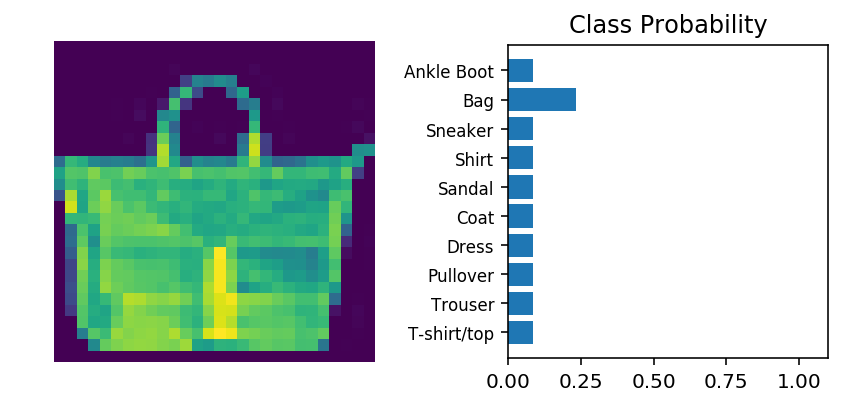

In [38]:
dataiter = iter(testloader)
images, labels = next(iter(trainloader))

# Convert 2D image to 1D vector
img=images[3].view(1,784)
with torch.no_grad():
    logits=model.forward(img)
# TODO: Calculate the class probabilities (softmax) for img
ps = F.softmax(logits,dim=1)
# Plot the image and probabilities
helper.view_classify(img.view(1,28,28), ps, version='Fashion')